In [19]:
from sympy import S, symbols, Eq, solve, diff, numbered_symbols
from sympy.plotting import plot

In [39]:
Nderivs = 8
coefficients = numbered_symbols('a') # generator
funcs = numbered_symbols('f')
x, ffinal = S('x ffinal'.split())

In [21]:
fs=[]
coefs = []
fs.append(next(funcs))
fs[-1] = 0

for i in range(Nderivs+1):
    coefs.append(next(coefficients))
    fs[-1] += coefs[-1]*x**(2*i+1)

In [22]:
fs[-1]

a0*x + a1*x**3 + a2*x**5 + a3*x**7 + a4*x**9 + a5*x**11 + a6*x**13 + a7*x**15 + a8*x**17

In [23]:
for i in range(1,Nderivs+1):
    fs.append(next(funcs))
    fs[-1] = diff(fs[-2],x)
    print(fs[-1])

a0 + 3*a1*x**2 + 5*a2*x**4 + 7*a3*x**6 + 9*a4*x**8 + 11*a5*x**10 + 13*a6*x**12 + 15*a7*x**14 + 17*a8*x**16
6*a1*x + 20*a2*x**3 + 42*a3*x**5 + 72*a4*x**7 + 110*a5*x**9 + 156*a6*x**11 + 210*a7*x**13 + 272*a8*x**15
6*a1 + 60*a2*x**2 + 210*a3*x**4 + 504*a4*x**6 + 990*a5*x**8 + 1716*a6*x**10 + 2730*a7*x**12 + 4080*a8*x**14
120*a2*x + 840*a3*x**3 + 3024*a4*x**5 + 7920*a5*x**7 + 17160*a6*x**9 + 32760*a7*x**11 + 57120*a8*x**13
120*a2 + 2520*a3*x**2 + 15120*a4*x**4 + 55440*a5*x**6 + 154440*a6*x**8 + 360360*a7*x**10 + 742560*a8*x**12
5040*a3*x + 60480*a4*x**3 + 332640*a5*x**5 + 1235520*a6*x**7 + 3603600*a7*x**9 + 8910720*a8*x**11
5040*a3 + 181440*a4*x**2 + 1663200*a5*x**4 + 8648640*a6*x**6 + 32432400*a7*x**8 + 98017920*a8*x**10
362880*a4*x + 6652800*a5*x**3 + 51891840*a6*x**5 + 259459200*a7*x**7 + 980179200*a8*x**9


In [24]:
fs[1].subs(x,1)

a0 + 3*a1 + 5*a2 + 7*a3 + 9*a4 + 11*a5 + 13*a6 + 15*a7 + 17*a8

In [25]:
equations = []
equations.append(Eq(fs[0].subs(x,0.5),0.5))

for f in fs[1:]:
    equations.append(Eq(f.subs(x,0.5), 0))

In [26]:
equations

[Eq(0.5*a0 + 0.125*a1 + 0.03125*a2 + 0.0078125*a3 + 0.001953125*a4 + 0.00048828125*a5 + 0.0001220703125*a6 + 3.0517578125e-5*a7 + 7.62939453125e-6*a8, 0.500000000000000),
 Eq(a0 + 0.75*a1 + 0.3125*a2 + 0.109375*a3 + 0.03515625*a4 + 0.0107421875*a5 + 0.003173828125*a6 + 0.00091552734375*a7 + 0.0002593994140625*a8, 0),
 Eq(3.0*a1 + 2.5*a2 + 1.3125*a3 + 0.5625*a4 + 0.21484375*a5 + 0.076171875*a6 + 0.025634765625*a7 + 0.00830078125*a8, 0),
 Eq(6*a1 + 15.0*a2 + 13.125*a3 + 7.875*a4 + 3.8671875*a5 + 1.67578125*a6 + 0.66650390625*a7 + 0.2490234375*a8, 0),
 Eq(60.0*a2 + 105.0*a3 + 94.5*a4 + 61.875*a5 + 33.515625*a6 + 15.99609375*a7 + 6.97265625*a8, 0),
 Eq(120*a2 + 630.0*a3 + 945.0*a4 + 866.25*a5 + 603.28125*a6 + 351.9140625*a7 + 181.2890625*a8, 0),
 Eq(2520.0*a3 + 7560.0*a4 + 10395.0*a5 + 9652.5*a6 + 7038.28125*a7 + 4350.9375*a8, 0),
 Eq(5040*a3 + 45360.0*a4 + 103950.0*a5 + 135135.0*a6 + 126689.0625*a7 + 95720.625*a8, 0),
 Eq(181440.0*a4 + 831600.0*a5 + 1621620.0*a6 + 2027025.0*a7 + 1914412.5

In [27]:
sol = solve(equations)

In [28]:
sol

{a5: -17403.7500000000,
 a3: -1709.29687500000,
 a0: 3.33847045898438,
 a1: -35.6103515625000,
 a6: 29452.5000000000,
 a2: 299.126953125000,
 a8: 12870.0000000000,
 a7: -29172.0000000000,
 a4: 6647.26562500000}

In [29]:
for i in range(len(fs)):
    for coef in coefs:
        fs[i] = fs[i].subs(coef,sol[coef])

In [30]:
fs[0]

12870.0*x**17 - 29172.0*x**15 + 29452.5*x**13 - 17403.75*x**11 + 6647.265625*x**9 - 1709.296875*x**7 + 299.126953125*x**5 - 35.6103515625*x**3 + 3.33847045898438*x

In [31]:
fs[1]

218790.0*x**16 - 437580.0*x**14 + 382882.5*x**12 - 191441.25*x**10 + 59825.390625*x**8 - 11965.078125*x**6 + 1495.634765625*x**4 - 106.8310546875*x**2 + 3.33847045898438

In [32]:
fs[2]

3500640.0*x**15 - 6126120.0*x**13 + 4594590.0*x**11 - 1914412.5*x**9 + 478603.125*x**7 - 71790.46875*x**5 + 5982.5390625*x**3 - 213.662109375*x

12870.0*x**17 - 29172.0*x**15 + 29452.5*x**13 - 17403.75*x**11 + 6647.265625*x**9 - 1709.296875*x**7 + 299.126953125*x**5 - 35.6103515625*x**3 + 3.33847045898438*x


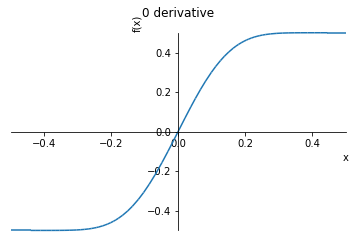

218790.0*x**16 - 437580.0*x**14 + 382882.5*x**12 - 191441.25*x**10 + 59825.390625*x**8 - 11965.078125*x**6 + 1495.634765625*x**4 - 106.8310546875*x**2 + 3.33847045898438


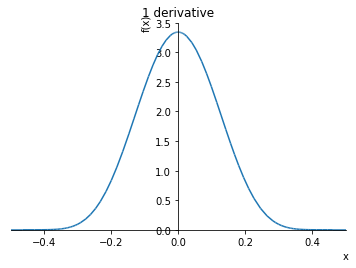

3500640.0*x**15 - 6126120.0*x**13 + 4594590.0*x**11 - 1914412.5*x**9 + 478603.125*x**7 - 71790.46875*x**5 + 5982.5390625*x**3 - 213.662109375*x


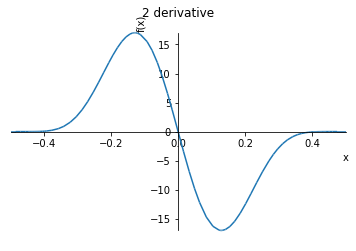

52509600.0*x**14 - 79639560.0*x**12 + 50540490.0*x**10 - 17229712.5*x**8 + 3350221.875*x**6 - 358952.34375*x**4 + 17947.6171875*x**2 - 213.662109375


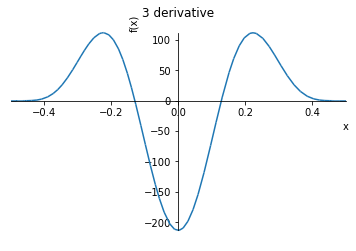

735134400.0*x**13 - 955674720.0*x**11 + 505404900.0*x**9 - 137837700.0*x**7 + 20101331.25*x**5 - 1435809.375*x**3 + 35895.234375*x


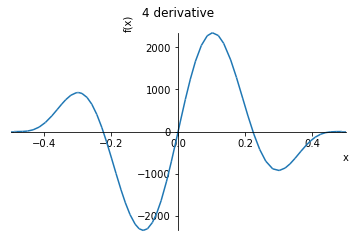

9556747200.0*x**12 - 10512421920.0*x**10 + 4548644100.0*x**8 - 964863900.0*x**6 + 100506656.25*x**4 - 4307428.125*x**2 + 35895.234375


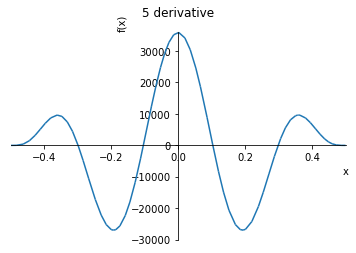

114680966400.0*x**11 - 105124219200.0*x**9 + 36389152800.0*x**7 - 5789183400.0*x**5 + 402026625.0*x**3 - 8614856.25*x


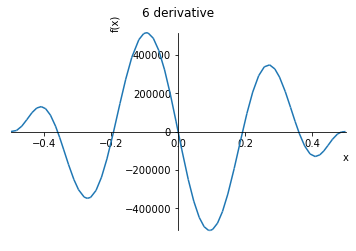

1261490630400.0*x**10 - 946117972800.0*x**8 + 254724069600.0*x**6 - 28945917000.0*x**4 + 1206079875.0*x**2 - 8614856.25


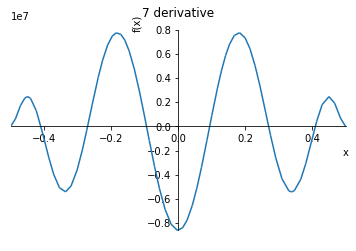

12614906304000.0*x**9 - 7568943782400.0*x**7 + 1528344417600.0*x**5 - 115783668000.0*x**3 + 2412159750.0*x


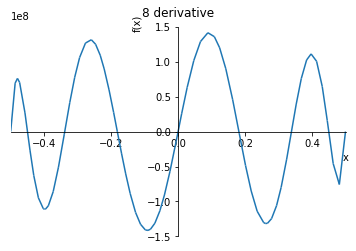

In [33]:
for i,f in enumerate(fs):
    print(f)
    plot(f, (x, -0.5, 0.5), title='{0} derivative'.format(i))

In [40]:
fs[0]

12870.0*x**17 - 29172.0*x**15 + 29452.5*x**13 - 17403.75*x**11 + 6647.265625*x**9 - 1709.296875*x**7 + 299.126953125*x**5 - 35.6103515625*x**3 + 3.33847045898438*x

In [41]:
ffinal = fs[0].subs(x, x-0.5) + 0.5

In [42]:
ffinal

3.33847045898438*x + 12870.0*(x - 0.5)**17 - 29172.0*(x - 0.5)**15 + 29452.5*(x - 0.5)**13 - 17403.75*(x - 0.5)**11 + 6647.265625*(x - 0.5)**9 - 1709.296875*(x - 0.5)**7 + 299.126953125*(x - 0.5)**5 - 35.6103515625*(x - 0.5)**3 - 1.16923522949219

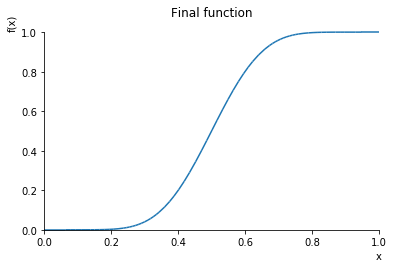

In [44]:
plot(ffinal, (x, 0, 1), title='Final function')